In [1]:
import dolfin
import mshr
import ufl
import numpy as np
import matplotlib.pyplot as plt
dolfin.parameters["form_compiler"]["cpp_optimize"] = True
dolfin.parameters["form_compiler"]["representation"] = "uflacs"
plt.style.use('seaborn-notebook')
%matplotlib inline

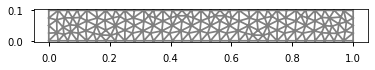

In [2]:
Lx, Ly = 1., .1
nx = 20
p0 = dolfin.Point(0,0)
p1 = dolfin.Point(Lx,Ly)
geom = mshr.Rectangle(p0,p1)
mesh = mshr.generate_mesh(geom,nx)

# Mark boundary subdomains
left = dolfin.CompiledSubDomain("near(x[0],0) && on_boundary")
right = dolfin.CompiledSubDomain("near(x[0],Lx) && on_boundary",Lx=Lx)
bottom = dolfin.CompiledSubDomain("near(x[1],0) && on_boundary")
top = dolfin.CompiledSubDomain("near(x[1],Ly) && on_boundary",Ly=Ly)

# Mark facets for Neumann BCs
boundary_indices = {'left': 1,
                    'right': 2,
                    'top': 3,
                    'bottom': 4}
boundary_markers = dolfin.MeshFunction("size_t", mesh, dim=1, value=0)
left.mark(boundary_markers, boundary_indices["left"])
right.mark(boundary_markers, boundary_indices["right"])
top.mark(boundary_markers, boundary_indices["top"])
bottom.mark(boundary_markers, boundary_indices["bottom"])

# Redefine element of area to include information about the markers
ds = dolfin.ds(domain=mesh, subdomain_data=boundary_markers)
dx = dolfin.dx(domain=mesh)
dolfin.plot(mesh)

In [3]:
V_element = dolfin.VectorElement('CG', ufl.triangle, degree=1) 
V = dolfin.FunctionSpace(mesh, V_element)
u = dolfin.Function(V)
v = dolfin.TestFunction(V)
w = dolfin.TrialFunction(V)

# Kinematics 
Id = ufl.Identity(2)    # Identity tensor
F = ufl.variable(Id + ufl.grad(u))  
C = F.T*F                   
Ic = ufl.tr(C)
J  = ufl.det(F)
E = 1/2*(C-Id)
# Stored strain energy density (compressible neo-Hookean model)
# Elasticity parameters (plane-stress)
Y, nu = 1.e3, 0.3
mu, lmbda = dolfin.Constant(Y/(2*(1 + nu))), dolfin.Constant(Y*nu/((1 + nu)*(1 - 2*nu)))
lmbda = 2*lmbda*mu/(lmbda + 2*mu) 
psi = lmbda*ufl.tr(E)**2/2+mu*ufl.inner(E,E)

sig_cr = Y*(np.pi*Ly/Lx)**2/48

g0 = dolfin.Expression(("-t*sig_cr", "eps*sig_cr"), t=0., eps=0.01, sig_cr=sig_cr, degree=0)  
potential_energy = psi*dx-ufl.dot(g0, u)*ds(boundary_indices['right'])

bcs = [dolfin.DirichletBC(V, (0.,0.), left)]

dE = ufl.derivative(potential_energy, u, v)
ddE = ufl.derivative(dE, u, w)

problem = dolfin.NonlinearVariationalProblem(dE, u, bcs=bcs, J=ddE)
solver = dolfin.NonlinearVariationalSolver(problem)
dolfin.info(solver.parameters, True)

eps_v = dolfin.sym(dolfin.grad(v))
eps_w = dolfin.sym(dolfin.grad(w))
sig_v = lmbda*dolfin.tr(eps_v)*Id+2*mu*eps_v

a_e = dolfin.inner(sig_v, eps_w)*dx
a_g = -dolfin.Constant(sig_cr)*dolfin.inner(v.dx(0), w.dx(0))*dx

K_e = dolfin.assemble(a_e)
K_g = dolfin.assemble(a_g)


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
Calling FFC just-in-time (JIT) compiler, this may take some time.
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps

---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10


---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10


---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10


---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10


---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10
---- setting additional slepc options -----
     eps_max_it : 100
-------------------------------------------
Solution method: krylovschur, stopping condition: tol=1e-08, maxit=100
Number of converged/requested eigenvalues with 1 iterations  : 10/10


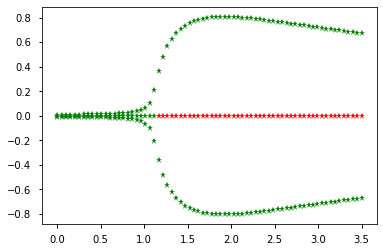

In [5]:
loads = np.linspace(0, 3.5, 70)
displ1 = np.zeros_like(loads)
displ2 = np.zeros_like(loads)
displ3 = np.zeros_like(loads)
u.interpolate(dolfin.Constant((0., 0.)))
file_u = dolfin.XDMFFile("output/u.xdmf")
file_u.parameters.update({"flush_output": True,
                          "functions_share_mesh": True,
                          "rewrite_function_mesh":False})

from slepc_eigensolver import EigenSolver
from slepc4py import SLEPc

for (i, t) in enumerate(loads):
    g0.t = t 
    g0.eps = 0.01
    solver.solve()
    aH = dolfin.inner(v,w)*dx 
    
    slepc_solver = SLEPc.EPS()
    slepc_solver.create()
    slepc_solver.setWhichEigenpairs(slepc_solver.Which.TARGET_MAGNITUDE)
    slepc_solver.setFromOptions()
    slepc_solver.setTarget(0.0) 
    st =slepc_solver.getST()
    st.setType('sinvert')
    
    eig_solver = EigenSolver(ddE, aH, u, bcs=bcs, slepc_eigensolver=slepc_solver)
    ncv, it = eig_solver.solve(10)
    eigenvalues, [eigenvectors_real, eigenvectors_im] = eig_solver.get_eigenpairs(10)
    eig_solver.save_eigenvectors(ncv)
    
    if (min(eigenvalues) > 0.):
        displ1[i] = dolfin.assemble(u[1]*ds(2))/Ly
        plt.plot(loads[i], displ1[i], "*g")
        
    else:
        displ1[i] = dolfin.assemble(u[1]*ds(2))/Ly
        plt.plot(loads[i], displ1[i], "*r")

u.interpolate(dolfin.Constant((0., 0.)))


for (i, t) in enumerate(loads):
    g0.t = t 
    g0.eps = -0.01
    solver.solve()
    aH = dolfin.inner(v,w)*dx 
    
    slepc_solver = SLEPc.EPS()
    slepc_solver.create()
    slepc_solver.setWhichEigenpairs(slepc_solver.Which.TARGET_MAGNITUDE)
    slepc_solver.setFromOptions()
    slepc_solver.setTarget(0.0) 
    st =slepc_solver.getST()
    st.setType('sinvert')
    
    eig_solver = EigenSolver(ddE, aH, u, bcs=bcs, slepc_eigensolver=slepc_solver)
    ncv, it = eig_solver.solve(10)
    eigenvalues, [eigenvectors_real, eigenvectors_im] = eig_solver.get_eigenpairs(10)
    eig_solver.save_eigenvectors(ncv)
    
    if (min(eigenvalues) > 0.):
        displ2[i] = dolfin.assemble(u[1]*ds(2))/Ly
        plt.plot(loads[i], displ2[i], "*g")
        
    else:
        displ2[i] = dolfin.assemble(u[1]*ds(2))/Ly
        plt.plot(loads[i], displ2[i], "*r")
        
        
for (i, t) in enumerate(loads):
    g0.t = t
    g0.eps = 0.
    solver.solve()
    aH = dolfin.inner(v,w)*dx 
       
    slepc_solver = SLEPc.EPS()
    slepc_solver.create()
    slepc_solver.setWhichEigenpairs(slepc_solver.Which.TARGET_MAGNITUDE)
    slepc_solver.setFromOptions()
    slepc_solver.setTarget(0.0) 
    st =slepc_solver.getST()
    st.setType('sinvert')
    
    eig_solver = EigenSolver(ddE, aH, u, bcs=bcs, slepc_eigensolver=slepc_solver)
    ncv, it = eig_solver.solve(10)
    eigenvalues, [eigenvectors_real, eigenvectors_im] = eig_solver.get_eigenpairs(10)
    eig_solver.save_eigenvectors(ncv)
    
    if (min(eigenvalues) > 0.):
        displ3[i] = dolfin.assemble(u[1]*ds(2))/Ly
        plt.plot(loads[i], displ3[i], "*g")
        
    else:
        displ3[i] = dolfin.assemble(u[1]*ds(2))/Ly
        plt.plot(loads[i], displ3[i], "*r")
